## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
   

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
Pokemon = pd.read_csv("Pokemon.csv", sep=";")

In [3]:
Pokemon.head()

,abilities,attack,capture_rate,classfication,defense,experience_growth,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P...",80,255.0,Rock Pokémon,100,1059860,0,40,Geodude,50,74,30,30,20,rock,ground,0,1,0
1,"['Stench', 'Sticky Hold', 'Poison Touch', 'Poi...",80,190.0,Sludge Pokémon,50,1000000,0,80,Grimer,50,88,40,50,25,poison,poison,0,1,0
2,"['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P...",95,120.0,Rock Pokémon,115,1059860,0,55,Graveler,50,75,45,45,35,rock,ground,0,1,0
3,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",75,255.0,Mouse Pokémon,90,1000000,0,50,Sandshrew,50,27,10,35,40,ground,ice,0,1,0
4,"['Chlorophyll', 'Harvest', 'Frisk', 'Harvest']",105,45.0,Coconut Pokémon,85,1250000,0,95,Exeggutor,50,103,125,75,45,grass,psychic,0,1,0


In [4]:
pokemon_train, pokemon_test = train_test_split(Pokemon, test_size=0.3, random_state=42, stratify=Pokemon['type1'])
print(pokemon_train.shape, pokemon_test.shape)

(560, 19) (241, 19)


### Gekozen om stratify te laten selecteren op type, dit maakt de trainingset meer accuraat omdat de waarden sterk verschillen tussen types pokemon. Zo is een rock type pokemon veel zwaarder dan een bug type

In [5]:
features= ['weight_kg']
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(pokemon_train[features], pokemon_train['speed'])

DecisionTreeRegressor(max_depth=3)

In [6]:
predictions = dt_regression.predict(Pokemon[features])

In [7]:
predictions

array([73.66666667, 73.66666667, 73.66666667, 73.66666667, 73.66666667,
       73.66666667, 73.66666667, 73.66666667, 73.66666667, 73.66666667,
       73.66666667, 73.66666667, 73.66666667, 73.66666667, 73.66666667,
       73.66666667, 73.66666667, 73.66666667, 73.66666667, 73.66666667,
       73.66666667, 73.66666667, 73.66666667, 73.66666667, 73.66666667,
       82.41666667, 82.41666667, 82.41666667, 82.41666667, 82.41666667,
       82.41666667, 82.41666667, 82.41666667, 82.41666667, 82.41666667,
       82.41666667, 82.41666667, 82.41666667, 82.41666667, 82.41666667,
       82.41666667, 82.41666667, 40.13333333, 40.13333333, 40.13333333,
       40.13333333, 40.13333333, 40.13333333, 40.13333333, 40.13333333,
       40.13333333, 40.13333333, 40.13333333, 40.13333333, 40.13333333,
       40.13333333, 40.13333333, 40.13333333, 40.13333333, 40.13333333,
       40.13333333, 40.13333333, 58.47555556, 58.47555556, 58.47555556,
       58.47555556, 58.47555556, 58.47555556, 58.47555556, 58.47

In [8]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [9]:
predictionsOnTrainset = dt_regression.predict(pokemon_train[features])
predictionsOnTestset = dt_regression.predict(pokemon_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, pokemon_train.speed)
rmseTest = calculate_rmse(predictionsOnTestset, pokemon_test.speed)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 26.513721978076294
RMSE on test set 30.375433038883585


### Ik had geen volledige 100% accuraatheid verwacht. Dit omdat de snelheid van een pokemon afhangt van veel factoren. Zo is het type ook erg van belang. En dit neem ik niet mee als criteria waarop ik selecteer.

In [10]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

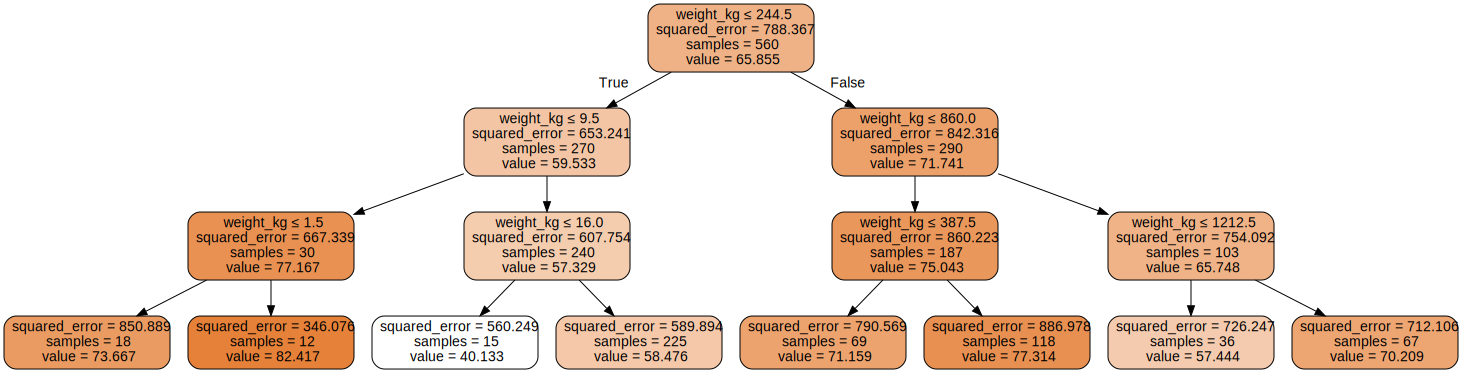

In [11]:
plot_tree_regression(dt_regression, features)